In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
all_data=load_breast_cancer()

In [ ]:
df=pd.DataFrame(all_data.data,columns=all_data.feature_names)

In [ ]:
df.shape

(569, 30)

In [ ]:
df['target']=all_data.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnois,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant,malignant


In [ ]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [ ]:
#make target human readable
df['diagnosis']=df['target'].map({0:'malignant',1:'benign'})

#verify
print(df[['target','diagnosis']].head())
df['diagnosis'].value_counts()

   target  diagnosis
0       0  malignant
1       0  malignant
2       0  malignant
3       0  malignant
4       0  malignant


,count
diagnosis,
benign,357
malignant,212


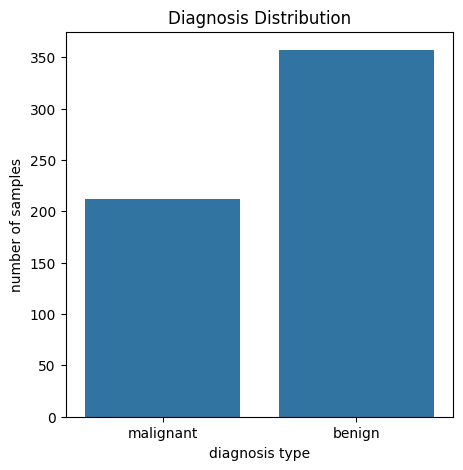

In [ ]:
#plot their count show as barchart
plt.figure(figsize=(5,5))
sns.countplot(x='diagnosis',data=df)
plt.title('Diagnosis Distribution')
plt.xlabel('diagnosis type')
plt.ylabel('number of samples')
plt.show()

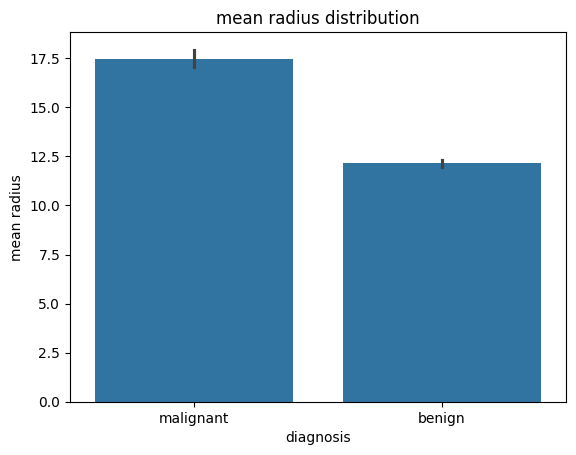

In [ ]:
#barplot automatically calculate the mean so we compare both size of tumours on the basis of mean if tumour radius
sns.barplot(x='diagnosis',y='mean radius',data=df)
plt.title('mean radius distribution')
plt.show()

In [ ]:
#group by means of each feature based on diagnosis
group_means=df.groupby('diagnosis').mean(numeric_only=True)
group_means.iloc[:,:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
diagnosis,,,,,
benign,12.146524,17.914762,78.075406,462.790196,0.092478
malignant,17.462830,21.604906,115.365377,978.376415,0.102898


In [ ]:
diff=group_means.loc['malignant']-group_means.loc['benign'].abs()
top_feature=diff.sort_values(ascending=False)
print(top_feature)

worst area                 863.386881
mean area                  515.586219
worst perimeter             54.364392
area error                  51.537257
mean perimeter              37.289971
worst radius                 7.755010
worst texture                5.803138
mean radius                  5.316306
mean texture                 3.690144
perimeter error              2.323608
radius error                 0.325000
worst concavity              0.284368
worst compactness            0.192152
mean concavity               0.114717
worst concave points         0.107793
mean compactness             0.065103
mean concave points          0.062273
worst symmetry               0.053222
worst smoothness             0.019886
mean symmetry                0.018723
concavity error              0.015827
worst fractal dimension      0.012088
compactness error            0.010843
mean smoothness              0.010421
concave points error         0.005203
fractal dimension error      0.000426
symmetry err

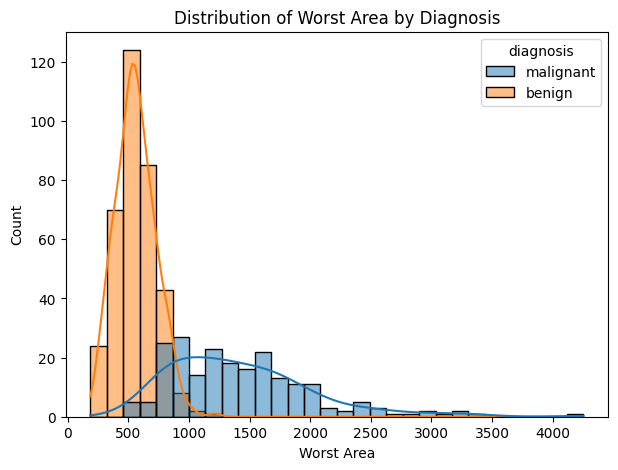

In [ ]:
# Step 6: Distribution of worst area by diagnosis
plt.figure(figsize=(7,5))

sns.histplot(
    data=df,
    x='worst area',
    hue='diagnosis',
    bins=30,
    kde=True
)

plt.title('Distribution of Worst Area by Diagnosis')
plt.xlabel('Worst Area')
plt.ylabel('Count')

plt.show()


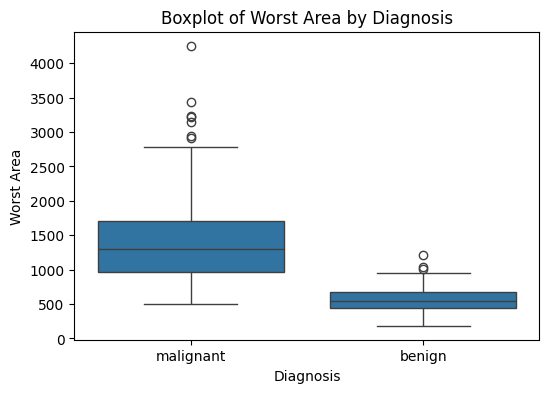

In [ ]:
# Step 7: Boxplot of worst area by diagnosis
plt.figure(figsize=(6,4))

sns.boxplot(
    x='diagnosis',
    y='worst area',
    data=df
)

plt.title('Boxplot of Worst Area by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Worst Area')

plt.show()


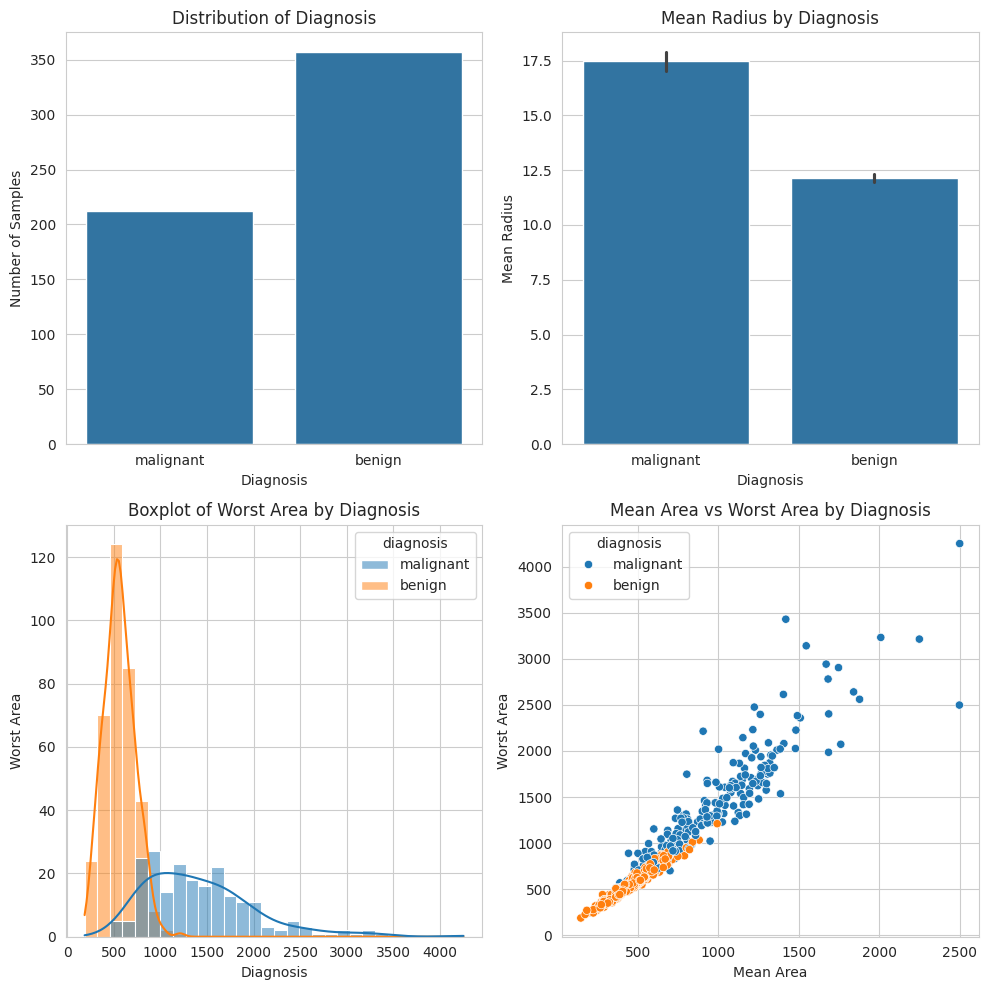

In [ ]:

# Set style
sns.set_style("whitegrid")

# Create 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(10,10))

# 1️⃣ Class distribution
sns.countplot(x='diagnosis', data=df, ax=axes[0,0])
axes[0,0].set_title('Distribution of Diagnosis')
axes[0,0].set_xlabel('Diagnosis')
axes[0,0].set_ylabel('Number of Samples')

# 2️⃣ Mean radius comparison
sns.barplot(x='diagnosis', y='mean radius', data=df, ax=axes[0,1])
axes[0,1].set_title('Mean Radius by Diagnosis')
axes[0,1].set_xlabel('Diagnosis')
axes[0,1].set_ylabel('Mean Radius')

# 3️⃣ Worst area distribution (boxplot)
sns.histplot(
    data=df,
    x='worst area',
    hue='diagnosis',
    bins=30,
    kde=True
, ax=axes[1,0])
axes[1,0].set_title('Boxplot of Worst Area by Diagnosis')
axes[1,0].set_xlabel('Diagnosis')
axes[1,0].set_ylabel('Worst Area')

# 4️⃣ Scatterplot: mean area vs worst area
sns.scatterplot(
    x='mean area',
    y='worst area',
    hue='diagnosis',
    data=df,
    ax=axes[1,1]
)
axes[1,1].set_title('Mean Area vs Worst Area by Diagnosis')
axes[1,1].set_xlabel('Mean Area')
axes[1,1].set_ylabel('Worst Area')

# Adjust layout
plt.tight_layout()
plt.show()
